In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
LEARNING_RATE = 0.01
ITERATION = 3_000

## 1. Data

In [3]:
x = torch.linspace(0, 10, dtype=torch.float).view(100, -1)  # (i)

noise = torch.randn(100, 1) * 10

y = 3 * x + noise

<font color=red>
    (i) torch.linspace(0, 100): gd exploding, and the loss gets nan!!! Decreasing the lr helps.
</font>

In [4]:
training_examples = x
training_labels = y

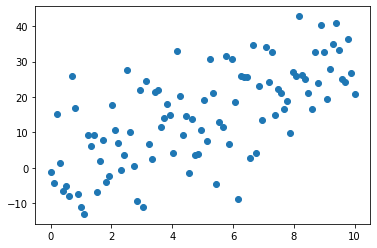

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

## 2. Model

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, inputs):
        return self.linear(inputs)

In [7]:
net = Net()

## 3. Criterion and Optimizer

In [8]:
criterion = nn.MSELoss()

In [9]:
optim = optim.SGD(net.parameters(), lr=LEARNING_RATE)

## 4. Train the Model

In [10]:
loss_list = []
weights_grad_list = []
bias_grad_list = []
running_loss = 0.0
for i in range(ITERATION): 
    optim.zero_grad()

    # Forward.
    outputs = net(training_examples)
    loss = criterion(outputs, training_labels)

    # Backward.
    loss.backward()

    # Updates params.
    optim.step()
    
    loss_list.append(loss)
    weights_grad_list.append(net.linear.weight.grad.sum().item())
    bias_grad_list.append(net.linear.bias.grad.item())
    running_loss += loss
    if running_loss % 20 == 19:
        print(f"iter: {i:>4}, loss: {loss / 20:.6f}")

iter: 2227, loss: 5.052263


In [11]:
for gd in weights_grad_list:
    print(gd)

-161.23724365234375
-50.835636138916016
-16.066511154174805
-5.116401195526123
-1.6675894260406494
-0.5811607837677002
-0.23873868584632874
-0.1306399405002594
-0.09631115198135376
-0.08521458506584167
-0.08145555853843689
-0.08001768589019775
-0.07927945256233215
-0.07877272367477417
-0.0783470869064331
-0.07796043157577515
-0.07756558060646057
-0.07717341184616089
-0.07678839564323425
-0.07641220092773438
-0.07602599263191223
-0.07564699649810791
-0.07527747750282288
-0.07490751147270203
-0.07453364133834839
-0.07416826486587524
-0.07379597425460815
-0.07343026995658875
-0.0730586051940918
-0.07270771265029907
-0.07233652472496033
-0.07197657227516174
-0.07162022590637207
-0.07127481698989868
-0.07092508673667908
-0.0705660879611969
-0.07020232081413269
-0.06986621022224426
-0.06952261924743652
-0.06917601823806763
-0.06883281469345093
-0.06849274039268494
-0.06814467906951904
-0.06780967116355896
-0.06748422980308533
-0.0671500563621521
-0.06681668758392334
-0.06647792458534241
-0.0

-0.0014469921588897705
-0.0014310479164123535
-0.0014432966709136963
-0.0014222264289855957
-0.0014180541038513184
-0.001427680253982544
-0.0014075636863708496
-0.0014139115810394287
-0.0014060437679290771
-0.0013842880725860596
-0.0013887286186218262
-0.0013782382011413574
-0.0013679862022399902
-0.0013731420040130615
-0.001345604658126831
-0.0013624131679534912
-0.0013495981693267822
-0.001330643892288208
-0.0013202428817749023
-0.00133436918258667
-0.0013180077075958252
-0.0013172030448913574
-0.001297593116760254
-0.001312255859375
-0.001291900873184204
-0.0012874007225036621
-0.0012829899787902832
-0.0012756288051605225
-0.0012562274932861328
-0.0012476444244384766
-0.0012552440166473389
-0.0012461841106414795
-0.0012376010417938232
-0.0012302100658416748
-0.0012192130088806152
-0.0012243688106536865
-0.001227647066116333
-0.0012164413928985596
-0.0012179315090179443
-0.0011973083019256592
-0.0011923611164093018
-0.0011910796165466309
-0.001175224781036377
-0.0011777281761169434
-

<font color=red>
    (i) The gd may not always decrease.
</font>

In [12]:
for gd in bias_grad_list:
    print(gd)

-23.672456741333008
-7.075282573699951
-1.850213885307312
-0.20656023919582367
0.30921050906181335
0.4697861075401306
0.5185073018074036
0.5320092439651489
0.5344319343566895
0.5333759784698486
0.5312296152114868
0.5287481546401978
0.5261749029159546
0.5235799551010132
0.5209859609603882
0.5183994174003601
0.5158275961875916
0.5132678747177124
0.510720431804657
0.5081841945648193
0.5056629776954651
0.5031528472900391
0.5006542205810547
0.49816858768463135
0.49569591879844666
0.4932345151901245
0.49078693985939026
0.4883507490158081
0.4859273135662079
0.4835137128829956
0.48111510276794434
0.4787270426750183
0.47635000944137573
0.473984032869339
0.4716308116912842
0.4692906141281128
0.46696293354034424
0.4646434187889099
0.46233582496643066
0.46004152297973633
0.45775750279426575
0.45548534393310547
0.45322543382644653
0.45097506046295166
0.4487348794937134
0.4465075433254242
0.44429096579551697
0.4420865774154663
0.4398915767669678
0.437709778547287
0.43553608655929565
0.43337535858154

0.05254286527633667
0.05228215456008911
0.05202341079711914
0.051764294505119324
0.05150727927684784
0.051251694560050964
0.050996407866477966
0.05074489116668701
0.05049276351928711
0.05024102330207825
0.04999096691608429
0.04974484443664551
0.04949960112571716
0.04925036430358887
0.04900732636451721
0.04876376688480377
0.04852214455604553
0.048282161355018616
0.048041388392448425
0.047802746295928955
0.0475635826587677
0.047328248620033264
0.047094523906707764
0.046860694885253906
0.04662621021270752
0.0463976114988327
0.04616504907608032
0.045935675501823425
0.045707955956459045
0.04548397660255432
0.045255109667778015
0.045032501220703125
0.04480913281440735
0.04458518326282501
0.0443631112575531
0.04414433240890503
0.043922290205955505
0.043707773089408875
0.04348991811275482
0.0432734489440918
0.043058499693870544
0.0428452342748642
0.04263347387313843
0.04242090880870819
0.04221220314502716
0.04200120270252228
0.041793182492256165
0.04158449172973633
0.041377827525138855
0.04117

0.0009375810623168945
0.0009327083826065063
0.0009281933307647705
0.0009237229824066162
0.0009192675352096558
0.0009165853261947632
0.0009095817804336548
0.0009056776762008667
0.0009012520313262939
0.0008974224328994751
0.0008923858404159546
0.0008881241083145142
0.0008818656206130981
0.0008795708417892456
0.0008729994297027588
0.000870928168296814
0.0008646398782730103
0.0008619576692581177
0.0008565932512283325
0.0008527785539627075
0.0008481144905090332
0.0008465349674224854
0.0008406192064285278
0.0008361637592315674
0.0008307546377182007
0.0008290708065032959
0.0008247792720794678
0.0008193403482437134
0.0008153319358825684
0.0008117854595184326
0.0008072853088378906
0.0008019953966140747
0.0008003413677215576
0.0007967948913574219
0.0007926970720291138
0.000789448618888855
0.0007818043231964111
0.0007808059453964233
0.0007768571376800537
0.0007731318473815918
0.0007699877023696899
0.0007641315460205078
0.0007607042789459229
0.0007576197385787964
0.0007541626691818237
0.0007485449

<font color=red>
    (i) The gd may not always decrease.
</font>

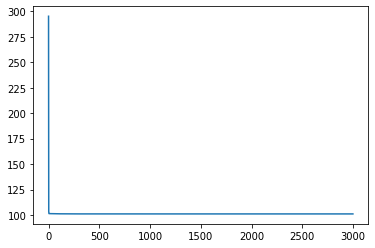

In [13]:
plt.plot([i for i in range(len(loss_list))], loss_list)
plt.show()

## 5. Test the Model

In [14]:
net(torch.tensor([
    [10]
], dtype=torch.float))

tensor([[30.4196]], grad_fn=<AddmmBackward>)